In [73]:
import numpy as np
import matplotlib.pyplot as plt

# HW 9 - Advanced Plotting
### Due November 11, 2024 at 11:59pm
Welcome to your last problem set of the semester! (\*confetti\*) It's time for the hardest but also coolest homework of the course. Have fun!

## 1) Subplot Plotting Practice

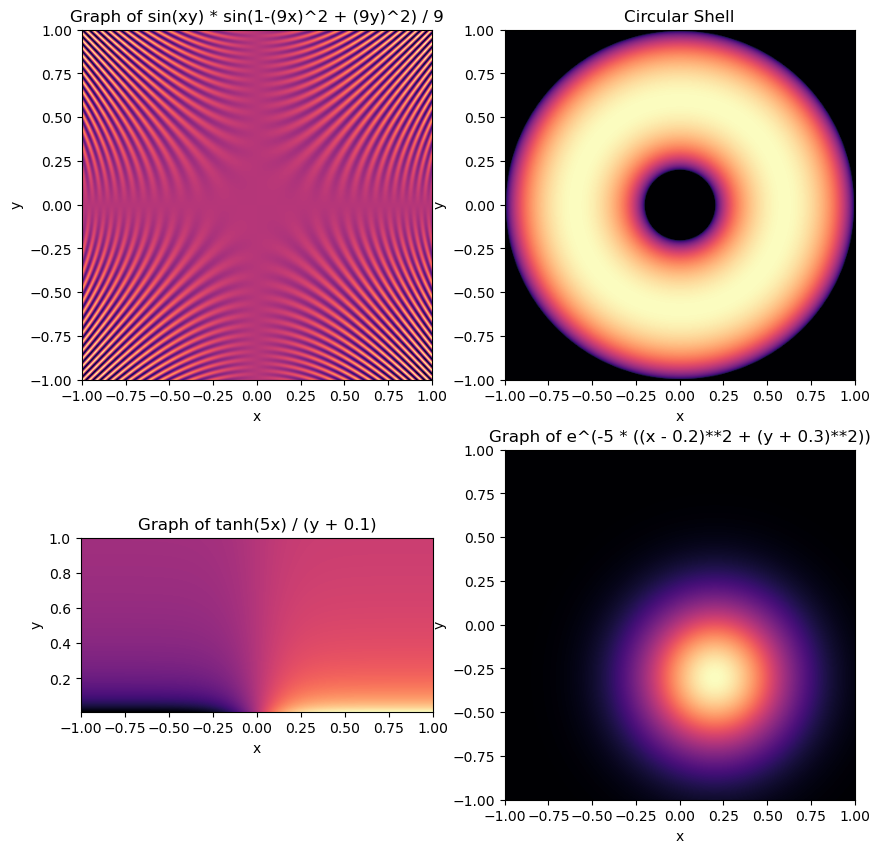

In [75]:
#Plot these functions on a 2 X 2 grid of subplots (4 plots total). Use fun colormaps!

def create_meshgrid(x_range, y_range, num_points=400):
    x = np.linspace(*x_range, num_points)
    y = np.linspace(*y_range, num_points)
    return np.meshgrid(x, y)

#Plot 1 (Top Left):
def function_1(x, y):
    return (np.sin(x*y) * np.sin(1 - (9*x)**2 + (9*y)**2)) / 9
"""
This plot has two sine functions w/ a nonlinear transformation. As we see in the graph the result 
is a distorted interface almost as if rippled waves are interfering in a plus sign crossing the 
center. The image as a whole has symmetry.
"""

#Plot 2 (Top Right):
def function_2(x, y):
    r = np.sqrt(x**2 + y**2)
    return np.sqrt(np.clip(0.4**2 - (0.6 - r)**2, 0, None))
"""
This plot depicts a shell centered at the origin. The outer radius has a radius of about 1 and the 
inner radius has a radius has a radius of about 0.25. 
"""

#Plot 3 (Bottom Left):
def function_3(x, y):
    return np.tanh(5*x) / (y + 0.1)
"""
This function is a hyperbolic tan function and it changes rapidly at x = 0. The result of plotting this
is a striped pattern that increases in intensity as y decreases. 
"""

#Plot 4 (Bottom Right):
def function_4(x, y):
    return np.exp(-5 * ((x - 0.2)**2 + (y + 0.3)**2))
"""
This plot is a smooth bump that is centered at about (0.24, -0.25). The color map makes it look like a bright peak 
that goes down quickly. The graph is an exponential with x and y in the power of e
"""

# Defining all plots
plot_configs = [
    {
        "func": function_1,
        "x_range": (-1, 1),
        "y_range": (-1, 1),
        "title": "Graph of sin(xy) * sin(1-(9x)^2 + (9y)^2) / 9"
    },
    {
        "func": function_2,
        "x_range": (-1, 1),
        "y_range": (-1, 1),
        "title": "Circular Shell"
    },
    {
        "func": function_3,
        "x_range": (-1, 1),
        "y_range": (0.01, 1), 
        "title": "Graph of tanh(5x) / (y + 0.1)"
    },
    {
        "func": function_4,
        "x_range": (-1, 1),
        "y_range": (-1, 1),
        "title": "Graph of e^(-5 * ((x - 0.2)**2 + (y + 0.3)**2))"
    }
]

# Setup figure
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
cmap = "magma"

# Loop over each subplot & draw corresponding function
for ax, config in zip(axes.flat, plot_configs):
    X, Y = create_meshgrid(config["x_range"], config["y_range"])
    Z = config["func"](X, Y)
    
    im = ax.imshow(Z, extent=[*config["x_range"], *config["y_range"]],
                   origin='lower', cmap=cmap)
    
    ax.set_title(config["title"])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
plt.show()

## 2) Random Plotting Practice

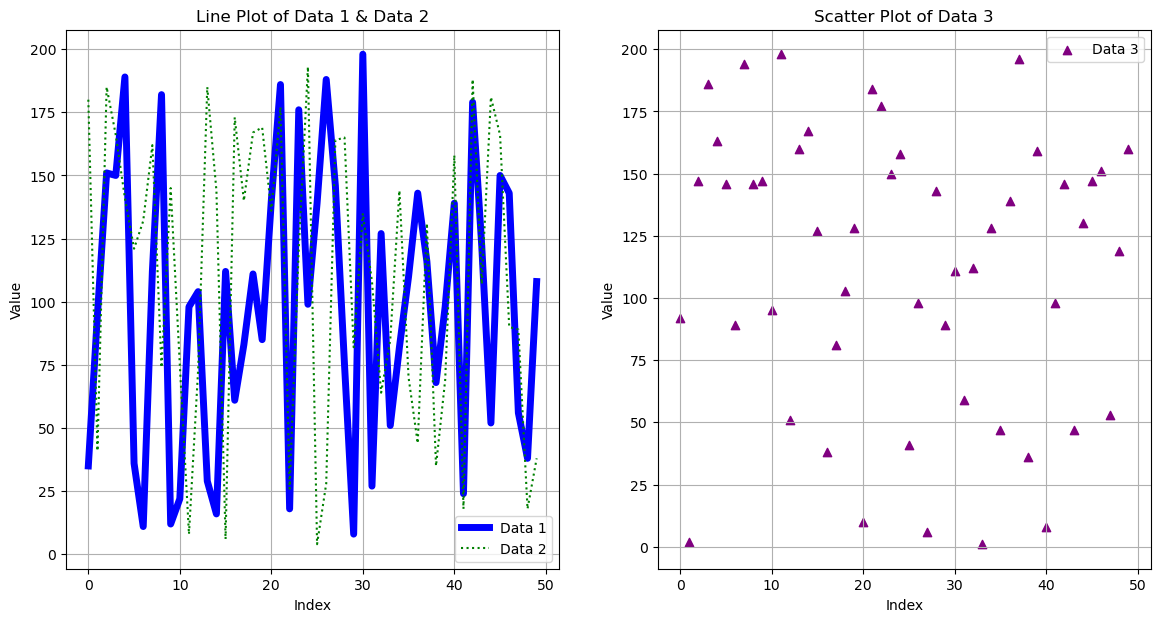

In [27]:
import numpy as np
import matplotlib.pyplot as plt

#Making 3 random lists of random numbers 
data_1 = np.random.randint(0, 201, 50)
data_2 = np.random.randint(0, 201, 50)
data_3 = np.random.randint(0, 201, 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

#Left subplot
ax1.plot(data_1, color='blue', linewidth=5, label="Data 1")
ax1.plot(data_2, color='green', linestyle=':', label="Data 2")
ax1.set_title("Line Plot of Data 1 & Data 2")
ax1.set_xlabel("Index")
ax1.set_ylabel("Value")
ax1.legend()
ax1.grid(True)

#Right subplot
x_values = np.arange(len(data3))
ax2.scatter(x_coords, data3, color='purple', marker='^', label="Data 3")
ax2.set_title("Scatter Plot of Data 3")
ax2.set_xlabel("Index")
ax2.set_ylabel("Value")
ax2.legend()
ax2.grid(True)

plt.show()

## 3) Monte Carlo

Did you know that you can estimate the value of $\pi$ using random numbers? Crazy statement but really cool.

First, you need to generate a large number of random points inside a 1x1 square with one corner at the origin (essentially you are making a unit circle).

Second, check how many of these points fall within a distance of 1 from the origin (in other words, a radius = 1). These points will lie inside a quarter circle, centered at the origin.

By using the ratio of points inside the quarter circle to the total number of points, we can estimate $\pi$! based on the relationship between the area of a quarter circle and the square.

Your task:
- Calculate an estimate of $\pi$ using this method of $N = 10, 10^3, 10^5, 10^6$. Print these results for each value of $N$. What do you notice as $N$ gets bigger?
- For $N=10^4$, plot the points within the quarter circle in one color and the points outside in another color. Make sure the entire plots is a square. Display the estimate value of $\pi$ on the plot. Don't forget to include a title and legend.


Using Monte Carlo method to estimate π:

N = 10      Estimated π ≈ 3.600000
N = 1000    Estimated π ≈ 3.068000
N = 100000  Estimated π ≈ 3.148480
N = 1000000 Estimated π ≈ 3.138404


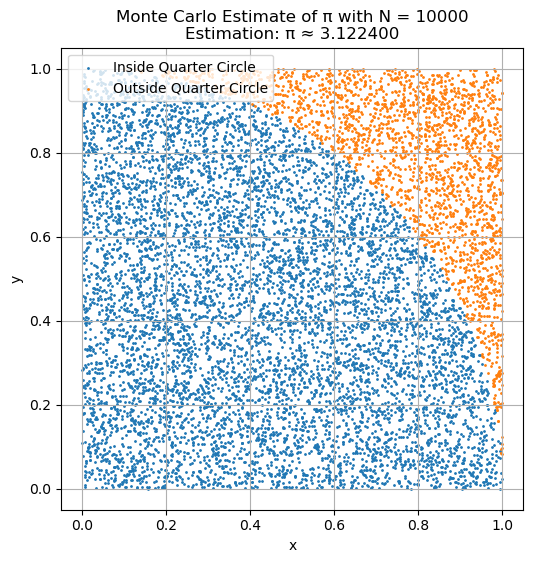

In [41]:
import numpy as np
import matplotlib.pyplot as plt

#Function for estimating pi
def estimate_pi(N):
    x = np.random.rand(N)
    y = np.random.rand(N)
    distances = np.sqrt(x**2 + y**2)
    inside = distances <= 1
    pi_estimate = 4 * np.sum(inside) / N
    return pi_estimate, x, y, inside

# Estimation for different N values
N_values = [10, 10**3, 10**5, 10**6]
print("Using Monte Carlo method to estimate π:\n")
for N in N_values:
    pi_est, _, _, _ = estimate_pi(N)
    print(f"N = {N:<7} Estimated π ≈ {pi_est:.6f}")

#N = 10^4
N_plot = 10**4
pi_est_plot, x_plot, y_plot, inside_plot = estimate_pi(N_plot)

# Plotting
plt.figure(figsize=(6, 6))
plt.scatter(x_plot[inside_plot], y_plot[inside_plot], s=1, label='Inside Quarter Circle')
plt.scatter(x_plot[~inside_plot], y_plot[~inside_plot], s=1, label='Outside Quarter Circle')
plt.title(f"Monte Carlo Estimate of π with N = {N_plot}\nEstimation: π ≈ {pi_est_plot:.6f}")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("square")
plt.legend()
plt.grid(True)
plt.show()

#As N gets, bigger, we see that the estimated pi gets closer and closer to its accurate value.

# Point-Spread Function

*Based on Astro 120 curriculum.*

When telescopes look at very distant sources (like stars or galaxies), the light they capture should look like a point source (focused point of light, think of a dot) on the detector.

However, due to the diffraction-limit of a telescope, atmospheric turbulence and imperfections in an optical system, the star does not appear like a point. Rather, it becomes a blurry spot on the detector which we model with a **point-spread function** (PSF).

To better visualize what the above paragraph is talking about, you will simulate the transition from a point source to a point-spread function using a 2D Gaussian function.

We can represent a point source as a single bright pixel in an image.

There is an example point-source vs. point-spread function plot in the homework 9 folder.


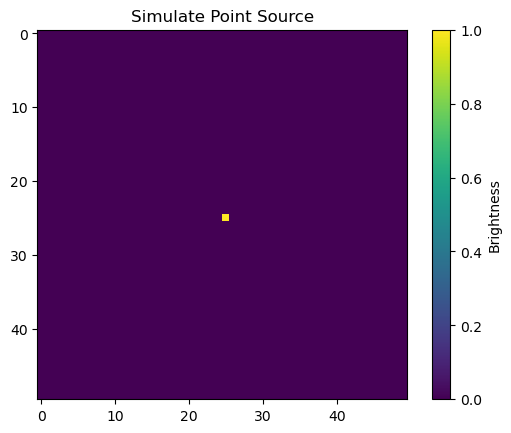

In [61]:
import numpy as np
import matplotlib.pyplot as plt

image = np.zeros((50, 50))
image[25, 25] = 1.0

# Plot the image
plt.imshow(image)
plt.title("Simulate Point Source")
plt.colorbar(label='Brightness')
plt.show()

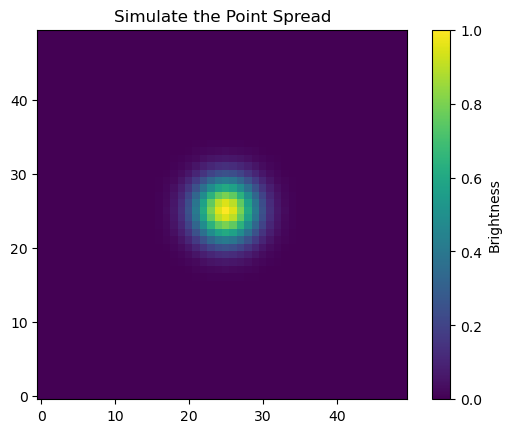

In [63]:
size = 50
A = 1.0
x0, y0 = 25, 25
sigma = 3

#Grid of x & y values
x = np.arange(0, size)
y = np.arange(0, size)
X, Y = np.meshgrid(x, y)

#Finding 2D Gaussian PSF
PSF = A * np.exp(-((X - x0)**2 + (Y - y0)**2) / (2 * sigma**2))

plt.imshow(PSF, origin='lower')
plt.colorbar(label='Brightness')
plt.title("Simulate the Point Spread")
plt.show()

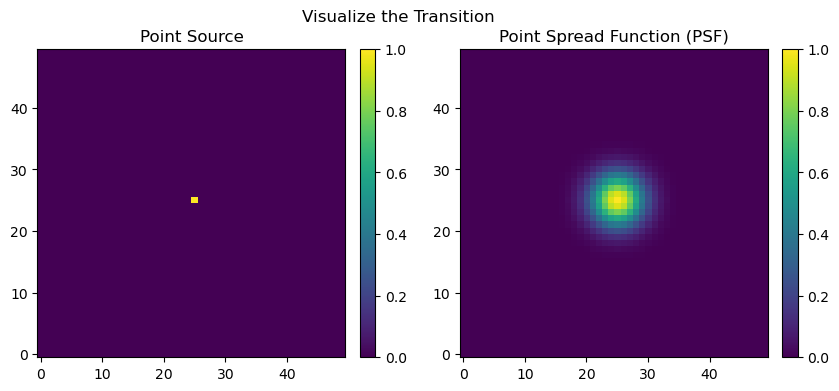

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

#Plotting the point source
im0 = axes[0].imshow(image, cmap='viridis', origin='lower')
axes[0].set_title("Point Source")
fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)

#Plotting the PSF
im1 = axes[1].imshow(PSF, cmap='viridis', origin='lower')
axes[1].set_title("Point Spread Function (PSF)")
fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)

fig.suptitle("Visualize the Transition")
plt.show()

In [ ]:
#Smaller sigma values means the light is more concentrated at the center while larger sigma values correspond to the light being more spread out.